In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [266]:
train=pd.read_csv(r"/home/devil/Downloads/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv(r"/home/devil/Downloads/house-prices-advanced-regression-techniques/test.csv")

In [267]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [268]:
train.shape

(1460, 81)

In [269]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Keeping our label which is to be predicted aside

In [270]:
x=train.iloc[:,1:-1]
y=train.iloc[:,-1]
ids=test.iloc[:,0]
test=test.iloc[:,1:]

In [271]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [272]:
x.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


### Let's check distribution of our label 

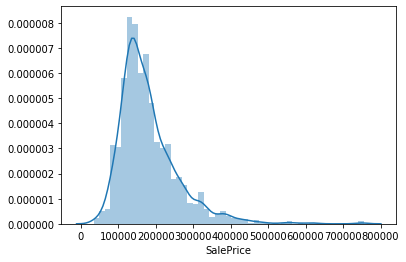

In [273]:
sns.distplot(y,label="SalePrice")

It is clear from the figure that data is not normally distributed and right skewed. We can solve it using log or square or cube of every point

In [274]:
#y=np.log(1+y) ### 1+y because log of 0 is infinity or not defined

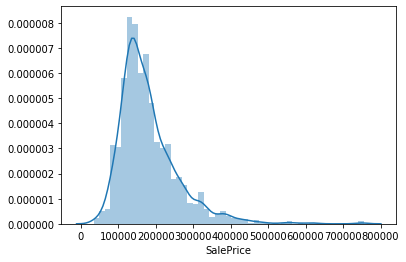

In [275]:
sns.distplot(y,label="SalePrice")

# Let's find which features are highly correalted with SalePrice using Seaborn Heatmap

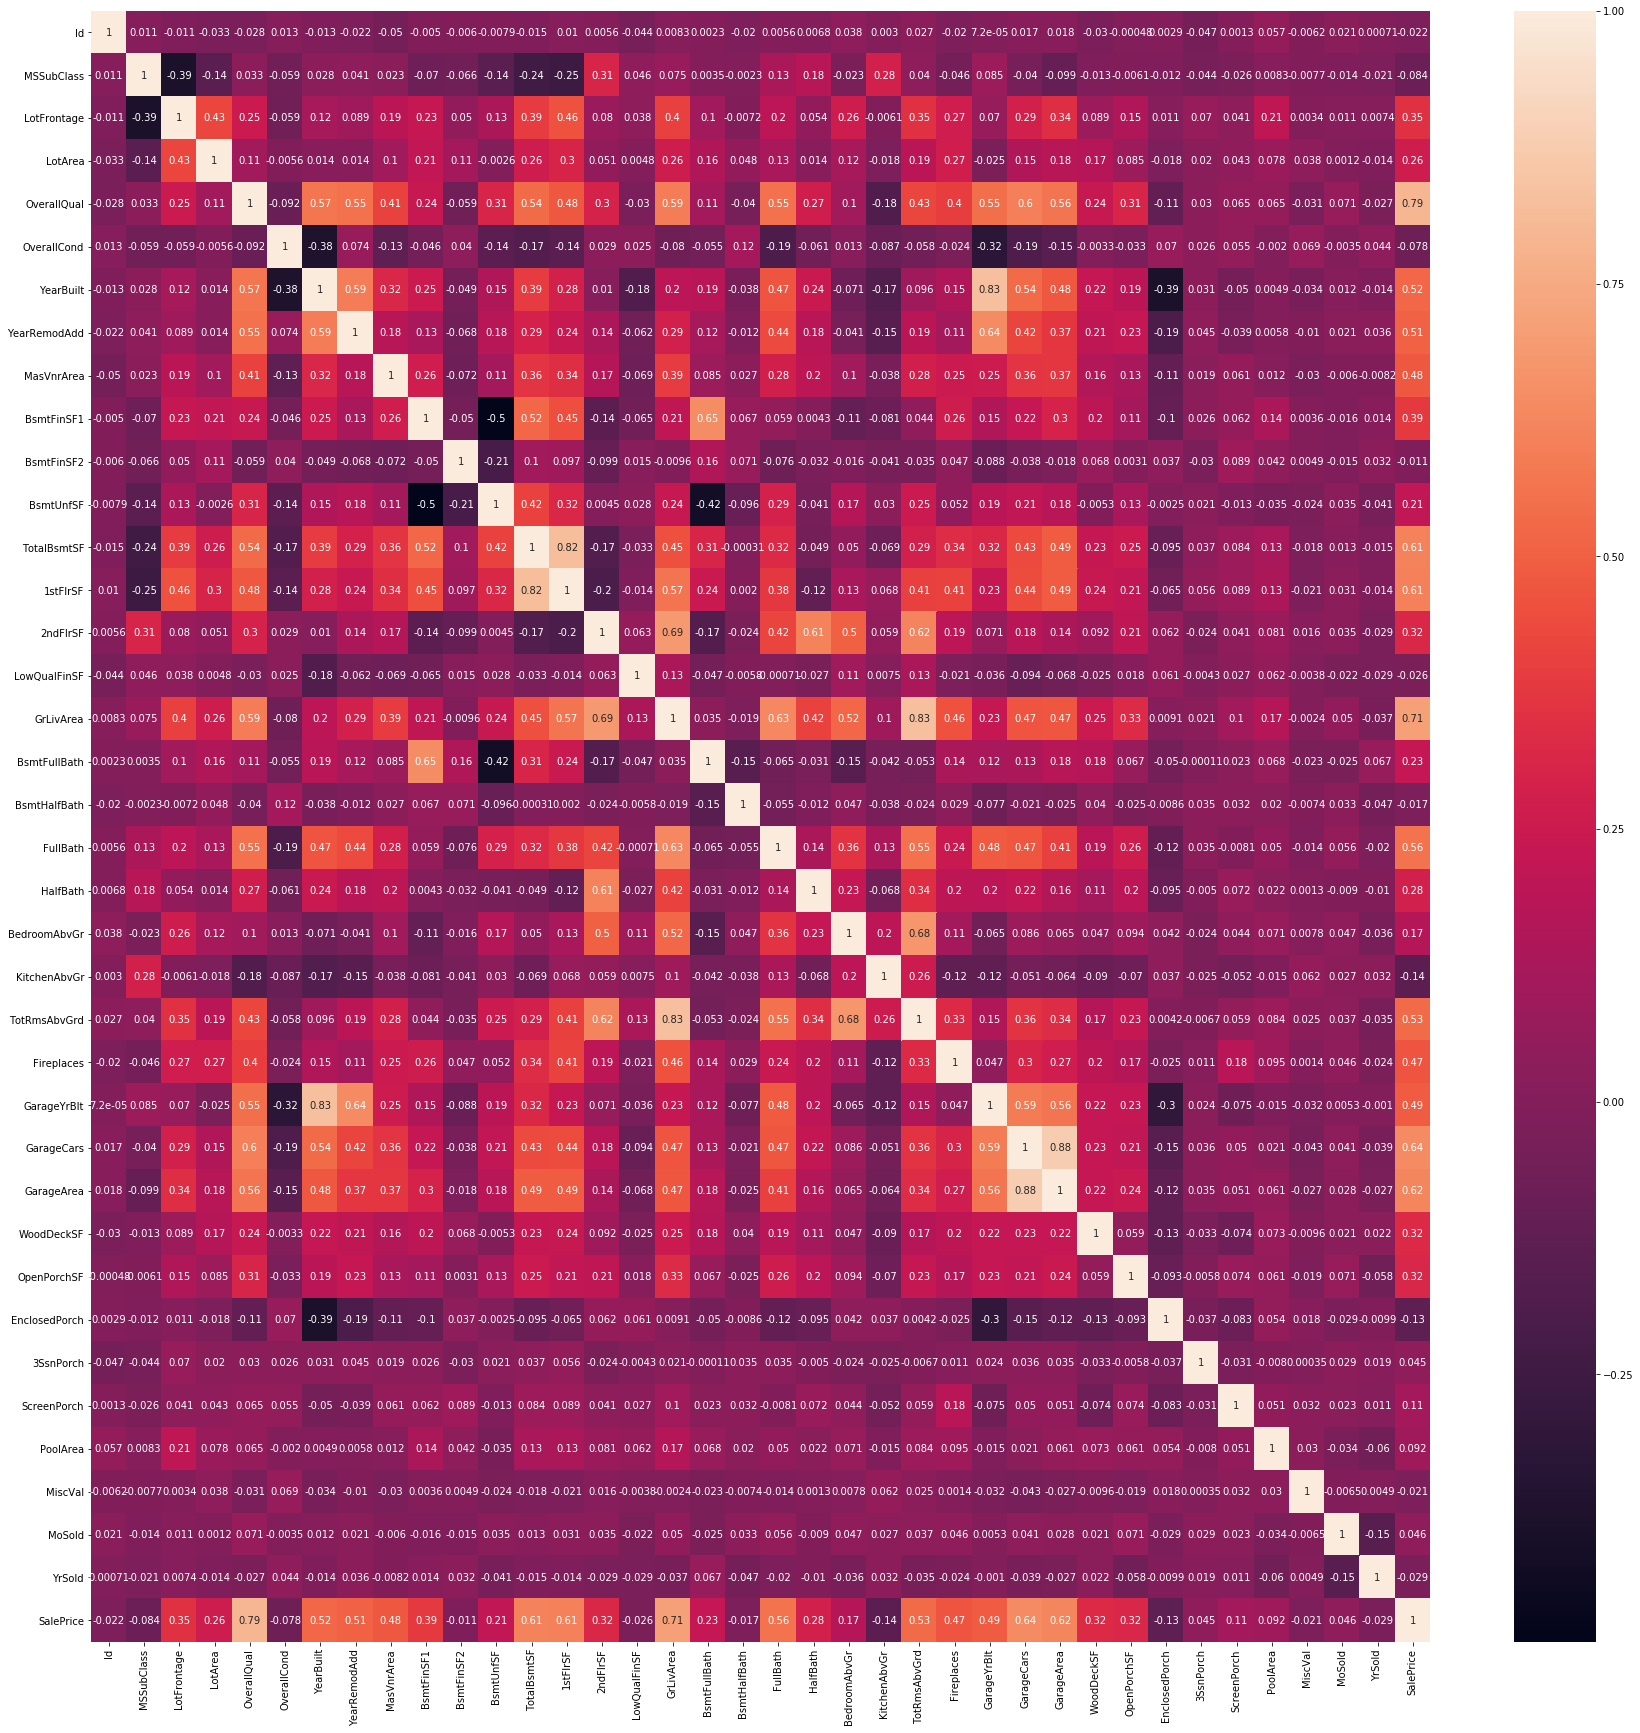

In [276]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),annot=True)
plt.show()

### Now let's extract the columns which are highly correlated with Sales Price 

Text(0, 0.5, 'SalePrice')

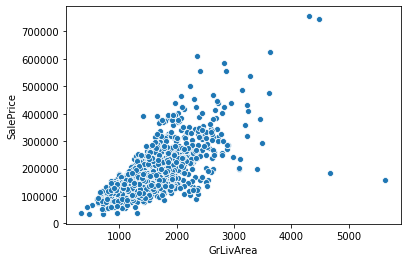

In [277]:
# It is clear from the heatmap OverallQual and GrLiveArea are highly correlated with Sale Price
# Let's do some visualization 
sns.scatterplot(train["GrLivArea"],train.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

It is clear from the plot that there are two outliers which instead of having high area doesn't have high Price that could be due to their condition is bad because that's also highly correlated with SalePrice

Text(0, 0.5, 'SalePrice')

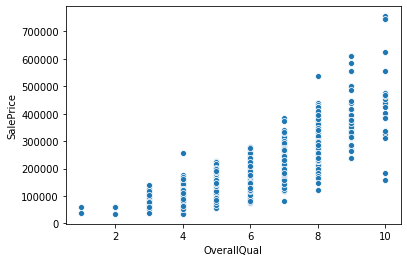

In [278]:
# let's visualize overall qual
sns.scatterplot(train["OverallQual"],train.SalePrice)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")


It is clear from the plot that there are two outliers which instead of having high overall quality doesn't have high Price let's see if it is related with our two ouliers from above

In [279]:
train=train[(train["GrLivArea"]!=4676)&(train["GrLivArea"]!=5642)]

### Let's get rid of these ouliers

In [280]:
x=x[(x["GrLivArea"]!=4676)&(x["GrLivArea"]!=5642)]
y=train["SalePrice"]
def normalise(x):
    if x.dtypes!="object":
        x=(x-x.min())/(x.max()-x.min())
    return x
x=x.apply(normalise,axis=0)
test=test.apply(normalise,axis=0)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,RL,0.150685,0.033420,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,0.090909,0.50,WD,Normal
1,0.000000,RL,0.202055,0.038795,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,0.363636,0.25,WD,Normal
2,0.235294,RL,0.160959,0.046507,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,0.727273,0.50,WD,Normal
3,0.294118,RL,0.133562,0.038561,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,0.090909,0.00,WD,Abnorml
4,0.235294,RL,0.215753,0.060576,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,1.000000,0.50,WD,Normal


In [281]:
x.shape

(1458, 79)

# Data Cleaning and Handling Missing Values

In [282]:
x.isna().sum()[x.isna().sum()>0]

LotFrontage      259
Alley           1367
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1404
dtype: int64

In [283]:
num_f=x.columns[x.dtypes!="object"]
cat_f=x.columns[x.dtypes=="object"]
x["LotFrontage"].fillna(x["LotFrontage"].mean(),inplace=True)
x["MasVnrArea"].fillna(x["MasVnrArea"].mean(),inplace=True)
x['GarageYrBlt']=x['GarageYrBlt'].fillna(x['GarageYrBlt'].mean())
x[cat_f]=x[cat_f].fillna("None")

In [284]:
x.isnull().sum()[x.isnull().sum()>0]

Series([], dtype: int64)

# Univariate Analysis

### Numerical Columns 

In [285]:
num_f.shape

(36,)

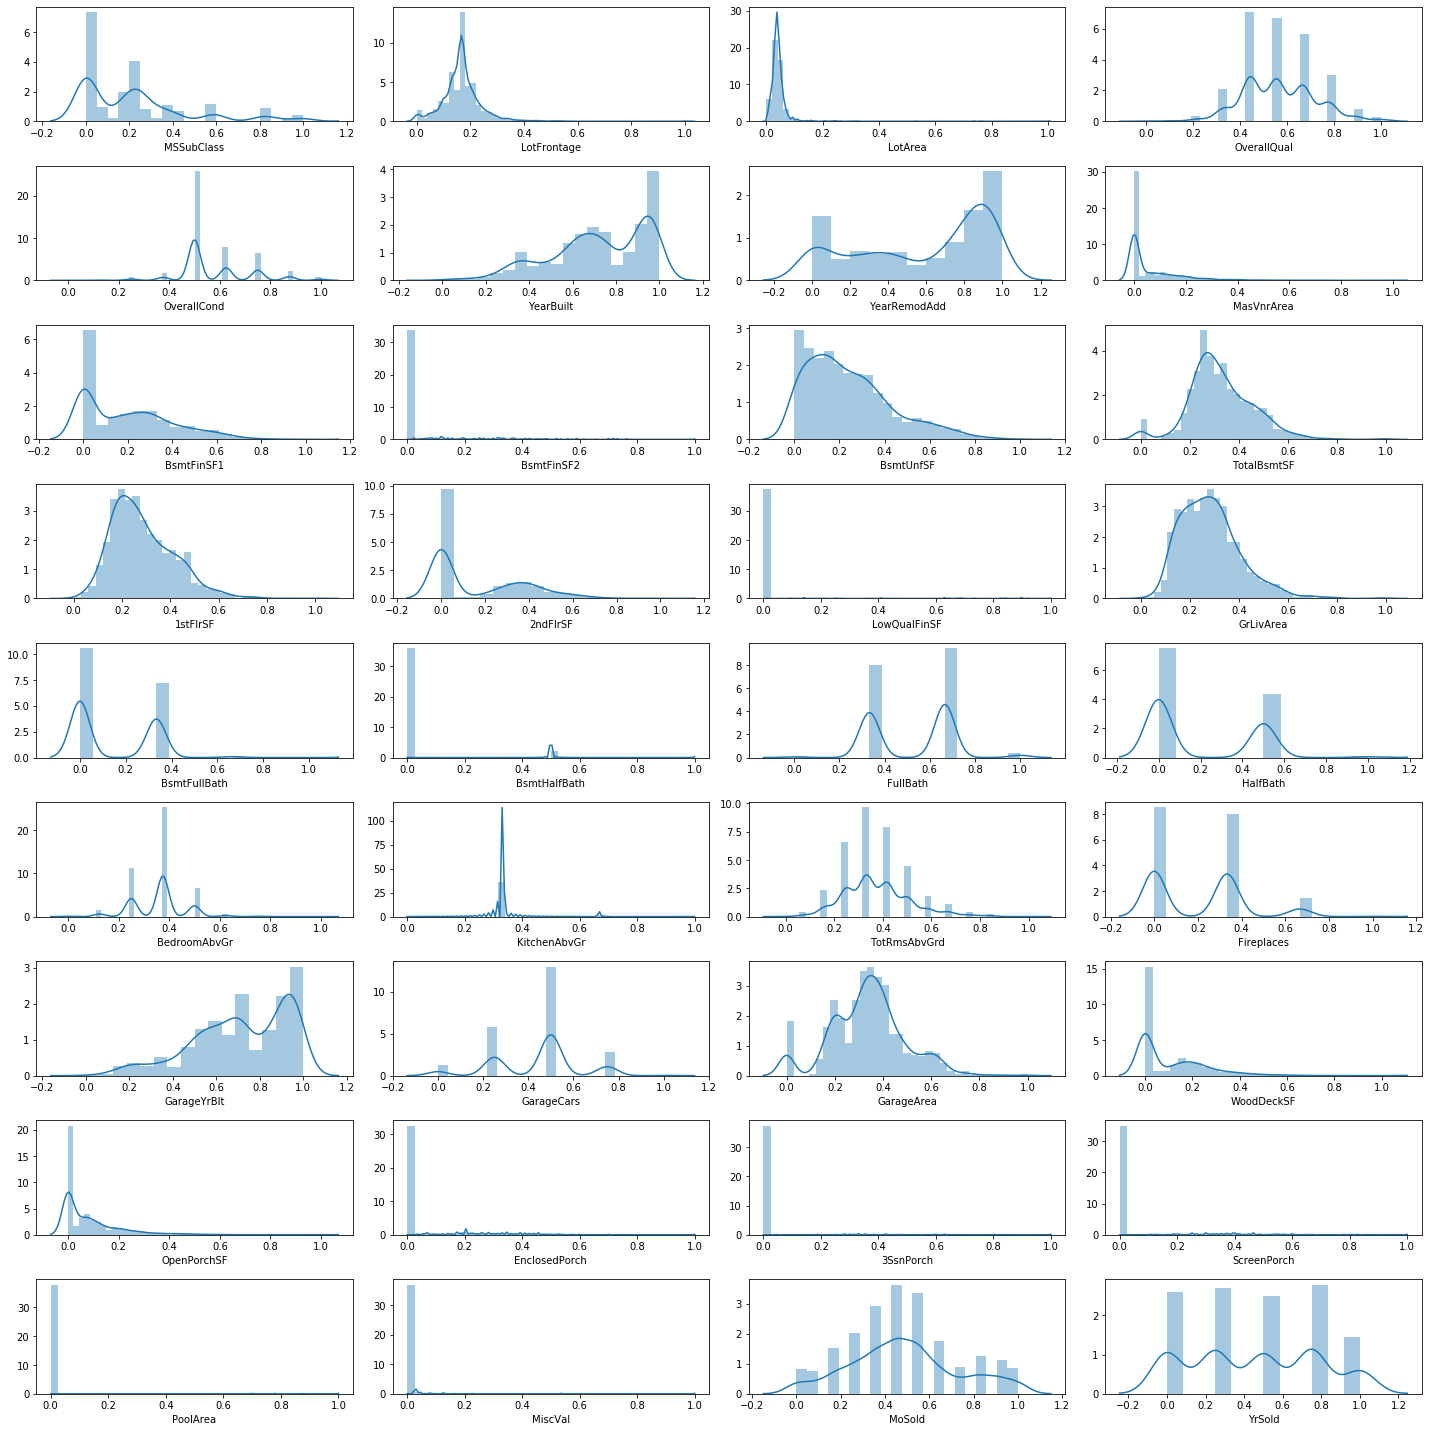

In [286]:
fig=plt.figure(figsize=(20,20))
j=0
for i in num_f:
    plt.subplot(9,4,j+1)
    sns.distplot(x[i],label=i)
    j+=1
fig.tight_layout()
plt.show()

#### Observations

Many continuous variable like Garage Area and GrLivArea are skewed 
let's take care of them using log transformation
and features like Yr sold and MoSold are usually object so let's also take care of them

In [287]:
x[["YrSold","MoSold","OverallQual"]]=x[["YrSold","MoSold","OverallQual"]].astype(str)
test[["YrSold","MoSold","OverallQual"]]=test[["YrSold","MoSold","OverallQual"]].astype(str)
x[["YrSold","MoSold","OverallQual"]].dtypes

YrSold         object
MoSold         object
OverallQual    object
dtype: object

In [288]:
def log_transform(x):
    if x.dtypes!="object":
        x=np.log(1+x)
    return x

In [289]:
x=x.apply(log_transform,axis=0)
test=test.apply(log_transform,axis=0)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.211309,RL,0.140357,0.032874,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,0.09090909090909091,0.5,WD,Normal
1,0.000000,RL,0.184032,0.038061,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,0.36363636363636365,0.25,WD,Normal
2,0.211309,RL,0.149246,0.045458,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,0.7272727272727273,0.5,WD,Normal
3,0.257829,RL,0.125365,0.037836,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.0,0.09090909090909091,0.0,WD,Abnorml
4,0.211309,RL,0.195364,0.058812,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,1.0,0.5,WD,Normal


### Let's visualise our numerical data distribution again 

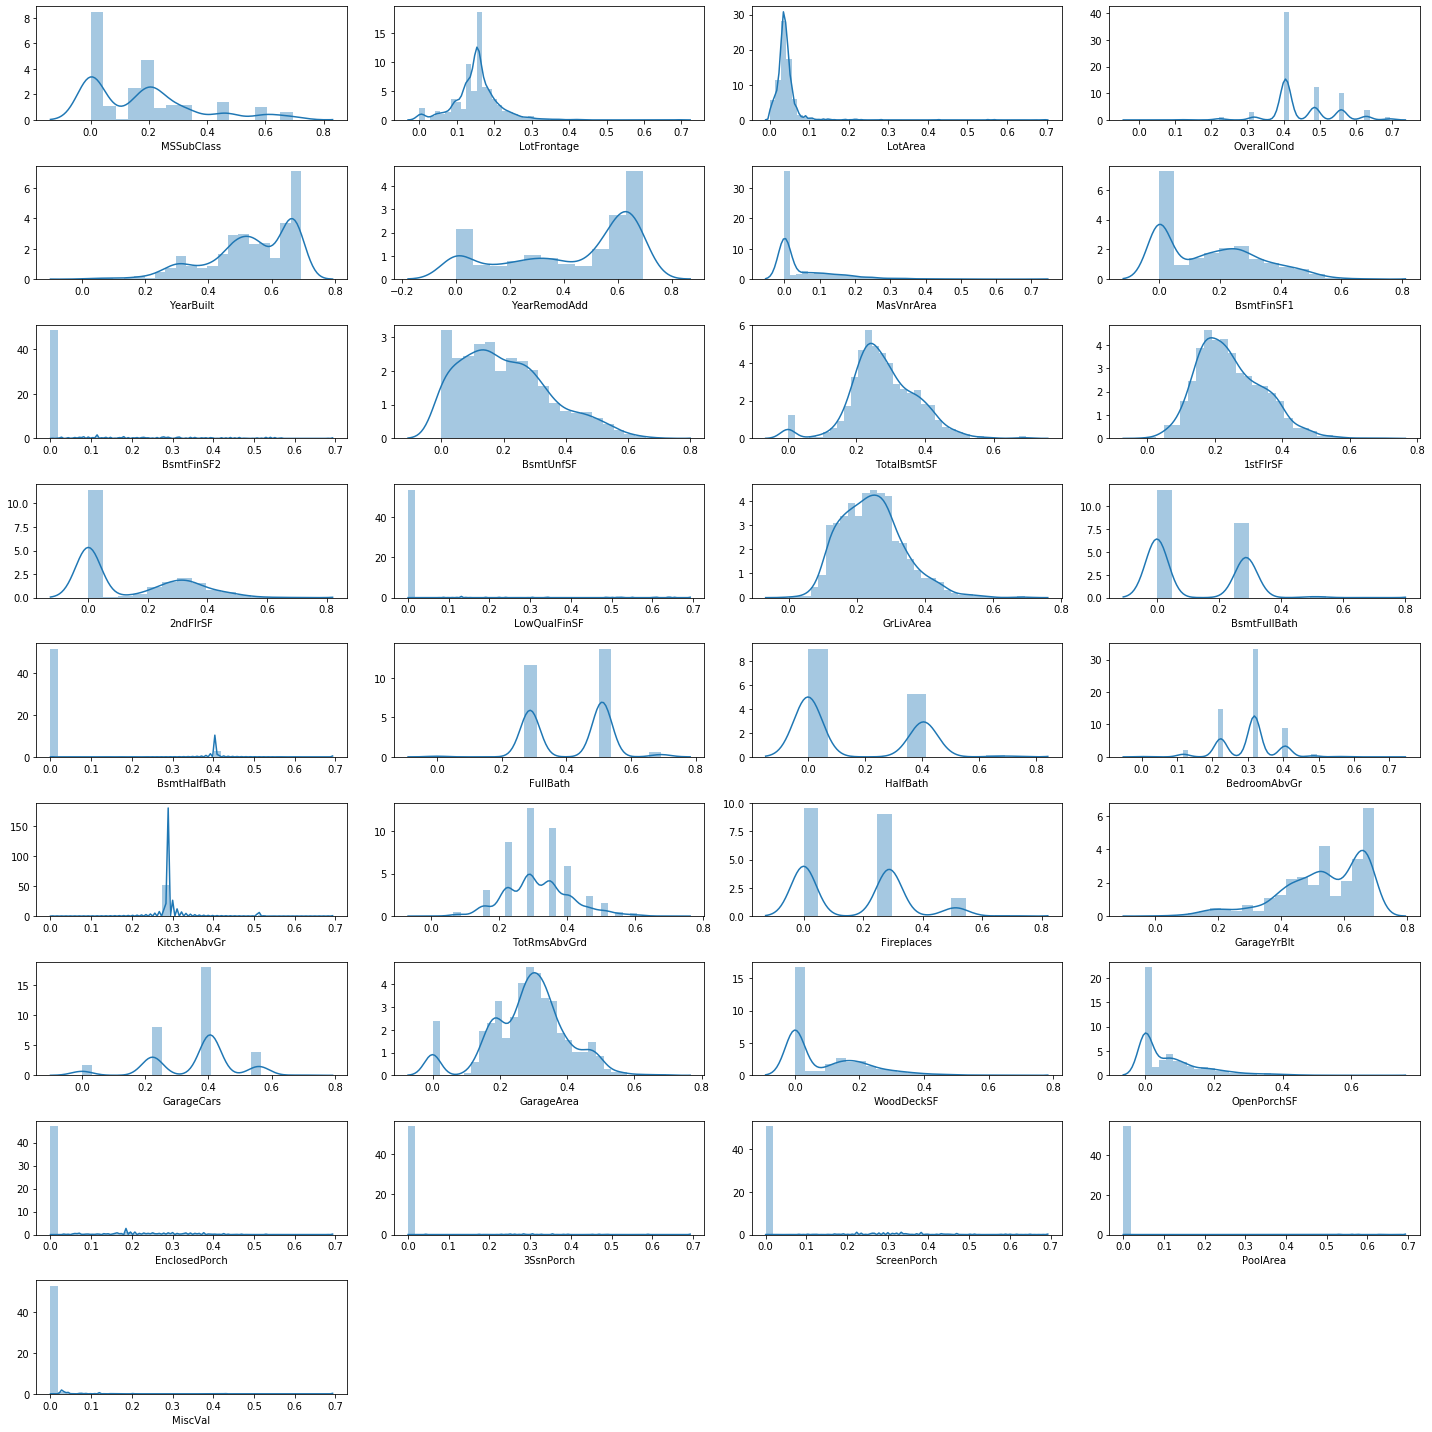

In [290]:
num_f=x.columns[x.dtypes!="object"]
cat_f=x.columns[x.dtypes=="object"]
fig=plt.figure(figsize=(20,20))
j=0
for i in num_f:
    plt.subplot(9,4,j+1)
    sns.distplot(x[i],label=i)
    j+=1
fig.tight_layout()
plt.show()

### Now let's do some Univariate Analysis for Categorical Variables 

In [291]:
fig=plt.figure(figsize=(100,100))
j=0
for i in cat_f:
    plt.subplot(16,3,j+1)
    sns.countplot(x[i],hue=x[i])
    j+=1
fig.tight_layout()
plt.show()

# Bivariate Analysis of Important Numerical Columns(i.e which are highly coefficient with label

In [292]:
#let's log_transform our label set before doing any analysis

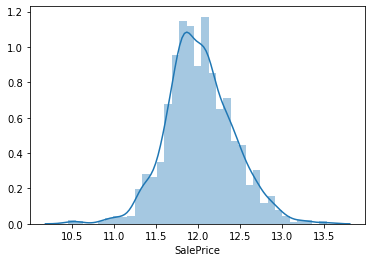

In [293]:
y=np.log(1+y)
sns.distplot(y,label="SalePrice")

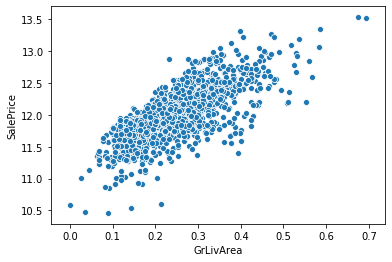

In [294]:
sns.scatterplot(x["GrLivArea"],y)

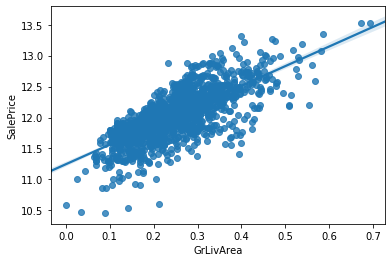

In [295]:
sns.regplot(x["GrLivArea"],y)

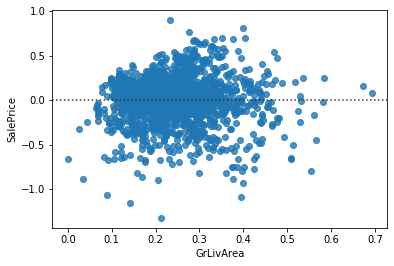

In [296]:
sns.residplot(x["GrLivArea"],y)

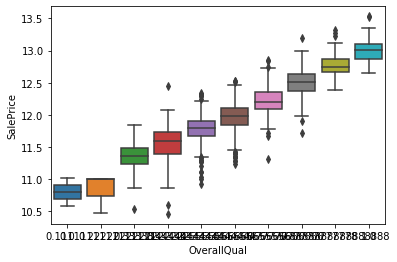

In [297]:
sns.boxplot(x["OverallQual"],y)

#### Observations  

It is clear from the above plots they are positively related with SalePrice

# Bivariate Analysis of Categorical Variables 

In [298]:
fig=plt.figure(figsize=(100,100))
j=0
for i in cat_f:
    plt.subplot(12,4,j+1)
    j+=1
    sns.boxplot(x[i],y)
fig.tight_layout()
plt.show()

### Observations

# Feature Engineering and Transformation

Let's throw out unnecessary features and let's make new features which migh give better result

First let get rid of FullBath and HalfBath, replace it with more meaning full column TotaBath

In [299]:
x["TotalBath"]=x["FullBath"]+x["HalfBath"]
test["TotalBath"]=test["FullBath"]+test["HalfBath"]

In [300]:
x.drop(["HalfBath","FullBath"],axis=1,inplace=True)
test.drop(["HalfBath","FullBath"],axis=1,inplace=True)

In [301]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBath
0,0.211309,RL,0.140357,0.032874,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,0.09090909090909091,0.5,WD,Normal,0.916291
1,0.000000,RL,0.184032,0.038061,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,0.36363636363636365,0.25,WD,Normal,0.510826
2,0.211309,RL,0.149246,0.045458,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,0.7272727272727273,0.5,WD,Normal,0.916291
3,0.257829,RL,0.125365,0.037836,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,None,None,None,0.0,0.09090909090909091,0.0,WD,Abnorml,0.287682
4,0.211309,RL,0.195364,0.058812,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,1.0,0.5,WD,Normal,0.916291


Garage Cars really don't make any sense. I am going to buy house based on it's features not by the no. of cars house owner owns and Garage Year Built also it's not reall helpful we can create has garage which is more useful

In [302]:
x.drop(["GarageCars"],axis=1,inplace=True)
test.drop(["GarageCars"],axis=1,inplace=True)

In [303]:
x["HasGarage"]=0
test["HasGarage"]=0
x[x["GarageYrBlt"]>0]["HasGarage"]=1
x.drop("GarageYrBlt",axis=1,inplace=True)
test[test["GarageYrBlt"]>0]["HasGarage"]=1
test.drop("GarageYrBlt",axis=1,inplace=True)
x.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBath,HasGarage
0,0.211309,RL,0.140357,0.032874,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0.0,0.09090909090909091,0.5,WD,Normal,0.916291,0
1,0.000000,RL,0.184032,0.038061,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,0.0,0.36363636363636365,0.25,WD,Normal,0.510826,0
2,0.211309,RL,0.149246,0.045458,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0.0,0.7272727272727273,0.5,WD,Normal,0.916291,0
3,0.257829,RL,0.125365,0.037836,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0.0,0.09090909090909091,0.0,WD,Abnorml,0.287682,0
4,0.211309,RL,0.195364,0.058812,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0.0,1.0,0.5,WD,Normal,0.916291,0


Let's add up all the total surface area of house as it might be useful in predicting prices

In [304]:
x["TotalSfArea"]=x["TotalBsmtSF"]+x["1stFlrSF"]+x["2ndFlrSF"]
test["TotalSfArea"]=test["TotalBsmtSF"]+test["1stFlrSF"]+test["2ndFlrSF"]

# Let's Convert our Categorical Variables to numeric using one hot encoding

In [305]:
x=pd.get_dummies(x,drop_first=True)
test=pd.get_dummies(test,drop_first=True)
x.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.211309,0.140357,0.032874,0.405465,0.667458,0.633043,0.115558,0.279652,0.0,0.062235,...,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.184032,0.038061,0.628609,0.561684,0.360003,0.000000,0.369481,0.0,0.114734,...,0,0,0,0,1,0,0,0,1,0
2,0.211309,0.149246,0.045458,0.405465,0.659995,0.624154,0.096446,0.200588,0.0,0.170407,...,0,0,0,0,1,0,0,0,1,0
3,0.257829,0.125365,0.037836,0.405465,0.271243,0.287682,0.000000,0.094146,0.0,0.207960,...,0,0,0,0,1,0,0,0,0,0
4,0.211309,0.195364,0.058812,0.405465,0.656243,0.606136,0.197826,0.261872,0.0,0.190422,...,0,0,0,0,1,0,0,0,1,0


In [306]:
x.shape

(1458, 279)

We have lot's of features let's try to pick only the most important ones using Backward Feature Elimination using statsmodels.api

In [307]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    x=sm.add_constant(x)
    regressor_OLS = sm.OLS(Y, x).fit()
    max_p=regressor_OLS.pvalues.max()
    while max_p>sl:
        x=np.delete(x,regressor_OLS.pvalues.argmax(),axis=1)
        columns=np.delete(columns,regressor_OLS.pvalues.argmax()-1)
        regressor_OLS = sm.OLS(Y, x).fit()
        max_p=regressor_OLS.pvalues.max()
        
                    
    regressor_OLS.summary()
    return x,columns


In [308]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(x.values, y.values, SL, x.columns)
reg=sm.OLS(y,data_modeled).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     269.7
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        09:18:35   Log-Likelihood:                 1355.3
No. Observations:                1458   AIC:                            -2541.
Df Residuals:                    1373   BIC:                            -2091.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0323      0.449     17.889      0.000       7.151       8.913
x1             0.1728      0.057      3.048      0.002       0.062       0.284
x2             0.8637      0.107      8.066      0.000       0.654       1.074
x3             0.5275      0.043     12.405      0.000       0.444       0.611
x4             0.3899      0.046      8.486      0.000       0.300       0.480
x5             0.0809      0.017      4.626      0.000       0.047       0.115
x6            -0.1675      0.036     -4.641      0.000      -0.238      -0.097
x7             0.6778      0.052     12.926      0.000       0.575       0.781
x8             1.5624      0.059     26.376      0.000       1.446       1.679
x9             0.0837      0.026      3.268      0.001       0.033       0.134
x10           -0.3679      0.063     -5.867      0.000      -0.491      -0.245
x11            0.2678      0.038      6.991      0.000       0.193       0.343
x12            0.0839      0.024      3.441      0.001       0.036       0.132
x13            0.0867      0.032      2.674      0.008       0.023       0.150
x14            0.1432      0.030      4.805      0.000       0.085       0.202
x15            2.8056      0.739      3.795      0.000       1.356       4.256
x16            0.0462      0.018      2.559      0.011       0.011       0.082
x17            0.4593      0.037     12.270      0.000       0.386       0.533
x18            0.4159      0.042      9.832      0.000       0.333       0.499
x19            0.4207      0.035     12.059      0.000       0.352       0.489
x20            0.3692      0.035     10.561      0.000       0.301       0.438
x21            0.0349      0.011      3.067      0.002       0.013       0.057
x22           -0.2353      0.043     -5.465      0.000      -0.320      -0.151
x23            0.1181      0.016      7.589      0.000       0.088       0.149
x24           -0.0545      0.011     -4.768      0.000      -0.077      -0.032
x25           -0.1266      0.027     -4.633      0.000      -0.180      -0.073
x26            0.0824      0.021      3.855      0.000       0.040       0.124
x27            0.0489      0.008      5.931      0.000       0.033       0.065
x28           -0.0647      0.031     -2.070      0.039      -0.126      -0.003
x29           -0.5074      0.148     -3.425      0.001      -0.798      -0.217
x30           -0.0535      0.018     -2.994      0.003      -0.089      -0.018
x31           -0.1012      0.040     -2.502      0.012      -0.180      -0.022
x32            0.3547      0.116      3.048      0.002       0.126       0.583
x33            0.4403      0.104      4.242      0.000       0.237       0.644
x34            0.4825      0.102      4.734      0.000       0.283       0.682
x35            0.5153      0.102      5.043      0.000       0.315       0.716
x3

In [309]:
data_modeled=np.delete(data_modeled,0,axis=1)
x=pd.DataFrame(data_modeled,columns=selected_columns)
test=pd.DataFrame(data_modeled,columns=selected_columns)
x.head()

,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,KitchenAbvGr,...,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PoolQC_None,SaleType_ConLD,SaleType_New,SaleCondition_Normal
0,0.140357,0.032874,0.405465,0.667458,0.633043,0.062235,0.236651,0.286837,0.287682,0.287682,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.184032,0.038061,0.628609,0.561684,0.360003,0.114734,0.331917,0.202162,0.000000,0.287682,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.149246,0.045458,0.405465,0.659995,0.624154,0.170407,0.252284,0.300516,0.287682,0.287682,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.125365,0.037836,0.405465,0.271243,0.287682,0.207960,0.211725,0.288104,0.287682,0.287682,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.195364,0.058812,0.405465,0.656243,0.606136,0.190422,0.305382,0.371580,0.287682,0.287682,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [310]:
from sklearn.model_selection import train_test_split
X=x.iloc[:,:].values
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=3)

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Modeling Using Linear Regression 


In [312]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [328]:
pred=lreg.predict(x_test)
lreg.score(x_test,y_test)

0.9160077737371647

## Modeling Using Support Vector Regression

In [329]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_test,y_test)

/home/devil/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8688209033959049

In [315]:
pred1=svr.predict(x_test)

## Modeling Using Decision Trees

In [330]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
dtr.score(x_test,y_test)

0.7135208283360794

## Modeling Using Random Forest Regressor

In [331]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred3=rf.predict(x_test)
rf.score(x_test,y_test)

/home/devil/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8571199423791165

# Evaluating these models using sklearn metrics

### Absolute Mean Error of models

In [318]:
from sklearn import metrics

In [319]:
print("Linear Regression Error", metrics.mean_absolute_error(y_test,pred))
print("Support Vector Regression Error",metrics.mean_absolute_error(y_test,pred1))
print("Decision Tree Error",metrics.mean_absolute_error(y_test,pred2))
print("Random Forest Error",metrics.mean_absolute_error(y_test,pred3))

Linear Regression Error 0.07882564247652474
Support Vector Regression Error 0.10165731302096809
Decision Tree Error 0.15487028409174317
Random Forest Error 0.10697569083278259


### Mean Square Error

In [320]:
print("Linear Regression Error", metrics.mean_squared_error(y_test,pred))
print("Support Vector Regression Error",metrics.mean_squared_error(y_test,pred1))
print("Decision Tree Error",metrics.mean_squared_error(y_test,pred2))
print("Random Forest Error",metrics.mean_squared_error(y_test,pred3))

Linear Regression Error 0.012824960379670423
Support Vector Regression Error 0.020030028866289122
Decision Tree Error 0.046099797932974605
Random Forest Error 0.023550726835917073


### Root Mean Square Error 

In [321]:
print("Linear Regression Error", np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("Support Vector Regression Error",np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print("Decision Tree Error",np.sqrt(metrics.mean_squared_error(y_test,pred2)))
print("Random Forest Error",np.sqrt(metrics.mean_squared_error(y_test,pred3)))

Linear Regression Error 0.11324734160089774
Support Vector Regression Error 0.14152748449078406
Decision Tree Error 0.2147086349753419
Random Forest Error 0.1534624606733421


## Observations  

It is clear from the above results that Support Vector Regression turn out to be true hero and other non linear regressor also did well. It was expected for Linear Regression to fail as there was a lot of non-linearity in data

# Test Set

In [322]:
pred_t=lreg.predict(test.values)

In [323]:
pred_t1=svr.predict(test.values)

In [324]:
pred_t2=dtr.predict(test.values)

In [325]:
pred_t3=rf.predict(test.values)

In [326]:
SalePrice=pd.DataFrame(np.exp(pred_t),columns=["SalePrice"])
ids=pd.DataFrame(np.arange(1458),columns=["ID"])
df= pd.concat([ids,SalePrice], axis=1)

In [327]:
df.head()

,ID,SalePrice
0,0,207929.029882
1,1,189179.775920
2,2,218002.490166
3,3,168076.208687
4,4,286419.081278
